In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [3]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1124,1125,80,RL,NaN,9125,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,163900
354,355,50,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,140000
1152,1153,20,RL,90.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,230000
1021,1022,20,RL,64.0,7406,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,194000
466,467,20,RL,85.0,10628,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,4,2007,WD,Normal,167000


In [4]:
test_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
423,1884,60,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
1115,2576,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal
1028,2489,20,RL,91.0,11375,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
154,1615,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
350,1811,190,RM,63.0,7627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal


In [5]:
print("Train seti boyutu",train_df.shape)
print("Test seti boyutu",test_df.shape)

Train seti boyutu (1460, 81)
Test seti boyutu (1459, 80)


In [7]:
test_id = test_df['Id']
target_var = train_df['SalePrice']
df_combined = pd.concat([train_df, test_df])

df_combined = df_combined.drop(columns= ['Id', 'SalePrice'])

df_combined = df_combined.reset_index(drop=True)
print("Total veri seti boyutu",df_combined.shape)

Total veri seti boyutu (2919, 79)


In [10]:
 df_combined.describe(include= 'all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,2919,...,2919.000000,2919.000000,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919
unique,16,5,NaN,NaN,2,2,4,4,2,5,...,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6
top,20,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,1079,2265,NaN,NaN,2907,120,1859,2622,2916,2133,...,NaN,NaN,4,329,95,NaN,NaN,NaN,2525,2402
mean,NaN,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,NaN,...,16.062350,2.251799,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN
std,NaN,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,NaN,...,56.184365,35.663946,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN
min,NaN,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,NaN,NaN,59.000000,7478.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,NaN,NaN,68.000000,9453.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,NaN,NaN,80.000000,11570.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [11]:
#Kategorik bir veri olduğu halde sayısal bir tipteydi. Bu sebeple tip dönüşümü yaptım
df_combined['MSSubClass'] = df_combined['MSSubClass'].astype(str)

In [13]:
categorical_cols = df_combined.select_dtypes(include=["object"]).columns.to_list()
categorical_cols_with_nullValues = df_combined.loc[:, df_combined.isnull().sum()> 0].select_dtypes(include=["object"]).columns.to_list()
print(categorical_cols_with_nullValues)
print(f"Kategorik alan sayısı: {len(categorical_cols)}")
print(f"Null değer içeren kategorik alan sayısı: {len(categorical_cols_with_nullValues)}")

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
Kategorik alan sayısı: 44
Null değer içeren kategorik alan sayısı: 23


In [14]:
df_combined[categorical_cols_with_nullValues].isnull().sum()

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [15]:
#Null değer içeren kategorik verileri sınıflandırma
cat_cols_with_fewer_nullValues = []
for i in categorical_cols_with_nullValues:
    if df_combined[i].isnull().sum() < 50:
        cat_cols_with_fewer_nullValues.append(i)
        print(i, df_combined[i].isnull().sum())
print("------------------------------------------------------")
cat_cols_with_more_nullValues = []
for i in categorical_cols_with_nullValues:
    if df_combined[i].isnull().sum() > 50:
        cat_cols_with_more_nullValues.append(i)
        print(i, df_combined[i].isnull().sum())

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
Electrical 1
KitchenQual 1
Functional 2
SaleType 1
------------------------------------------------------
Alley 2721
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
FireplaceQu 1420
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2348
MiscFeature 2814


In [17]:
#Boş verileri doldurma
for col in cat_cols_with_fewer_nullValues:
    df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])

for col in cat_cols_with_more_nullValues:
    df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])

In [19]:
print(f"Null değer içeren kategorik alan sayısı: {df_combined[categorical_cols].isnull().sum().sum()}")

Null değer içeren kategorik alan sayısı: 0


In [23]:
numerical_cols = df_combined.select_dtypes(exclude=["object"]).columns.to_list()
numerical_cols_with_nullValues = df_combined.loc[:, df_combined.isnull().sum()> 0].select_dtypes(exclude=["object"]).columns.to_list()
print(numerical_cols_with_nullValues)
print(f"Numerik alan sayısı :{len(numerical_cols)}")
print(f"Null değer içeren alan sayısı :{len(numerical_cols_with_nullValues)}")

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
Numerik alan sayısı :35
Null değer içeren alan sayısı :11


In [24]:
df_combined[numerical_cols_with_nullValues].isnull().sum()

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [25]:
#Boş verileri doldurma
for col in numerical_cols_with_nullValues:
    df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])

In [26]:
df_combined[numerical_cols_with_nullValues].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [27]:
print(f"Veri setindeki null alan sayısı: {df_combined.isnull().sum().sum()}")

Veri setindeki null alan sayısı: 0


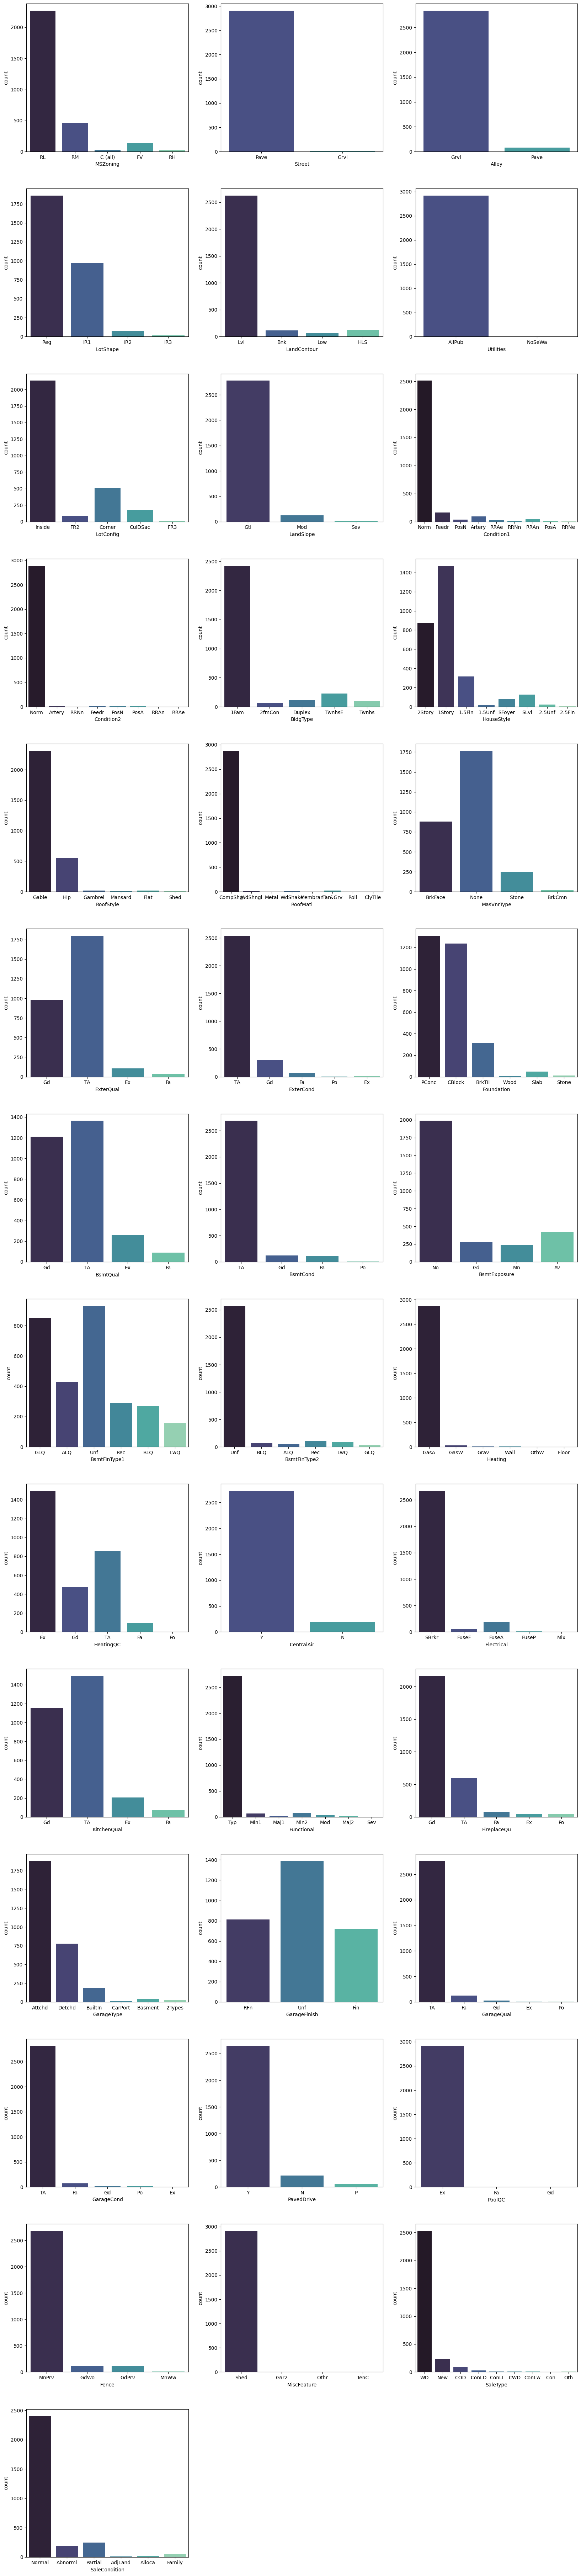

In [28]:
#Kategorik alanları görselleştirme
cols = []
for col in categorical_cols:
    if len(df_combined[col].unique()) <= 10:
        cols.append(col)

plt.figure(figsize=(20,100))
for i in range(len(cols)):
    plt.subplots_adjust(hspace=.25, wspace=.200)
    plt.subplot(15,3,i+1)

    sns.countplot(x=df_combined[cols[i]], palette = 'mako')

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_combined[categorical_cols].columns:
        df_combined[col] = le.fit_transform(df_combined[col])

In [30]:
import scipy.stats as stats

df_skewed = pd.DataFrame(df_combined[numerical_cols].select_dtypes(np.number).columns, columns=["Features"])
df_skewed["Skew"] = df_skewed["Features"].apply(lambda feature: stats.skew(df_combined[feature]))
df_skewed["Abs skew"] = df_skewed["Skew"].apply(abs)
df_skewed["Skewed"] = df_skewed["Abs skew"].apply(lambda x: True if x > .8 else False)
skewed_numerical_cols = df_skewed.query("Skewed == True")["Features"].values.tolist()
print(f"Sayısal olarka çarpık alan sayısı: {len(skewed_numerical_cols)}")
df_skewed

Number of numerical skewed columns: 20


,Features,Skew,Abs skew,Skewed
0,LotFrontage,1.784677,1.784677,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,False
4,YearBuilt,-0.599806,0.599806,False
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.613592,2.613592,True
7,BsmtFinSF1,1.425230,1.425230,True
8,BsmtFinSF2,4.146143,4.146143,True
9,BsmtUnfSF,0.919339,0.919339,True


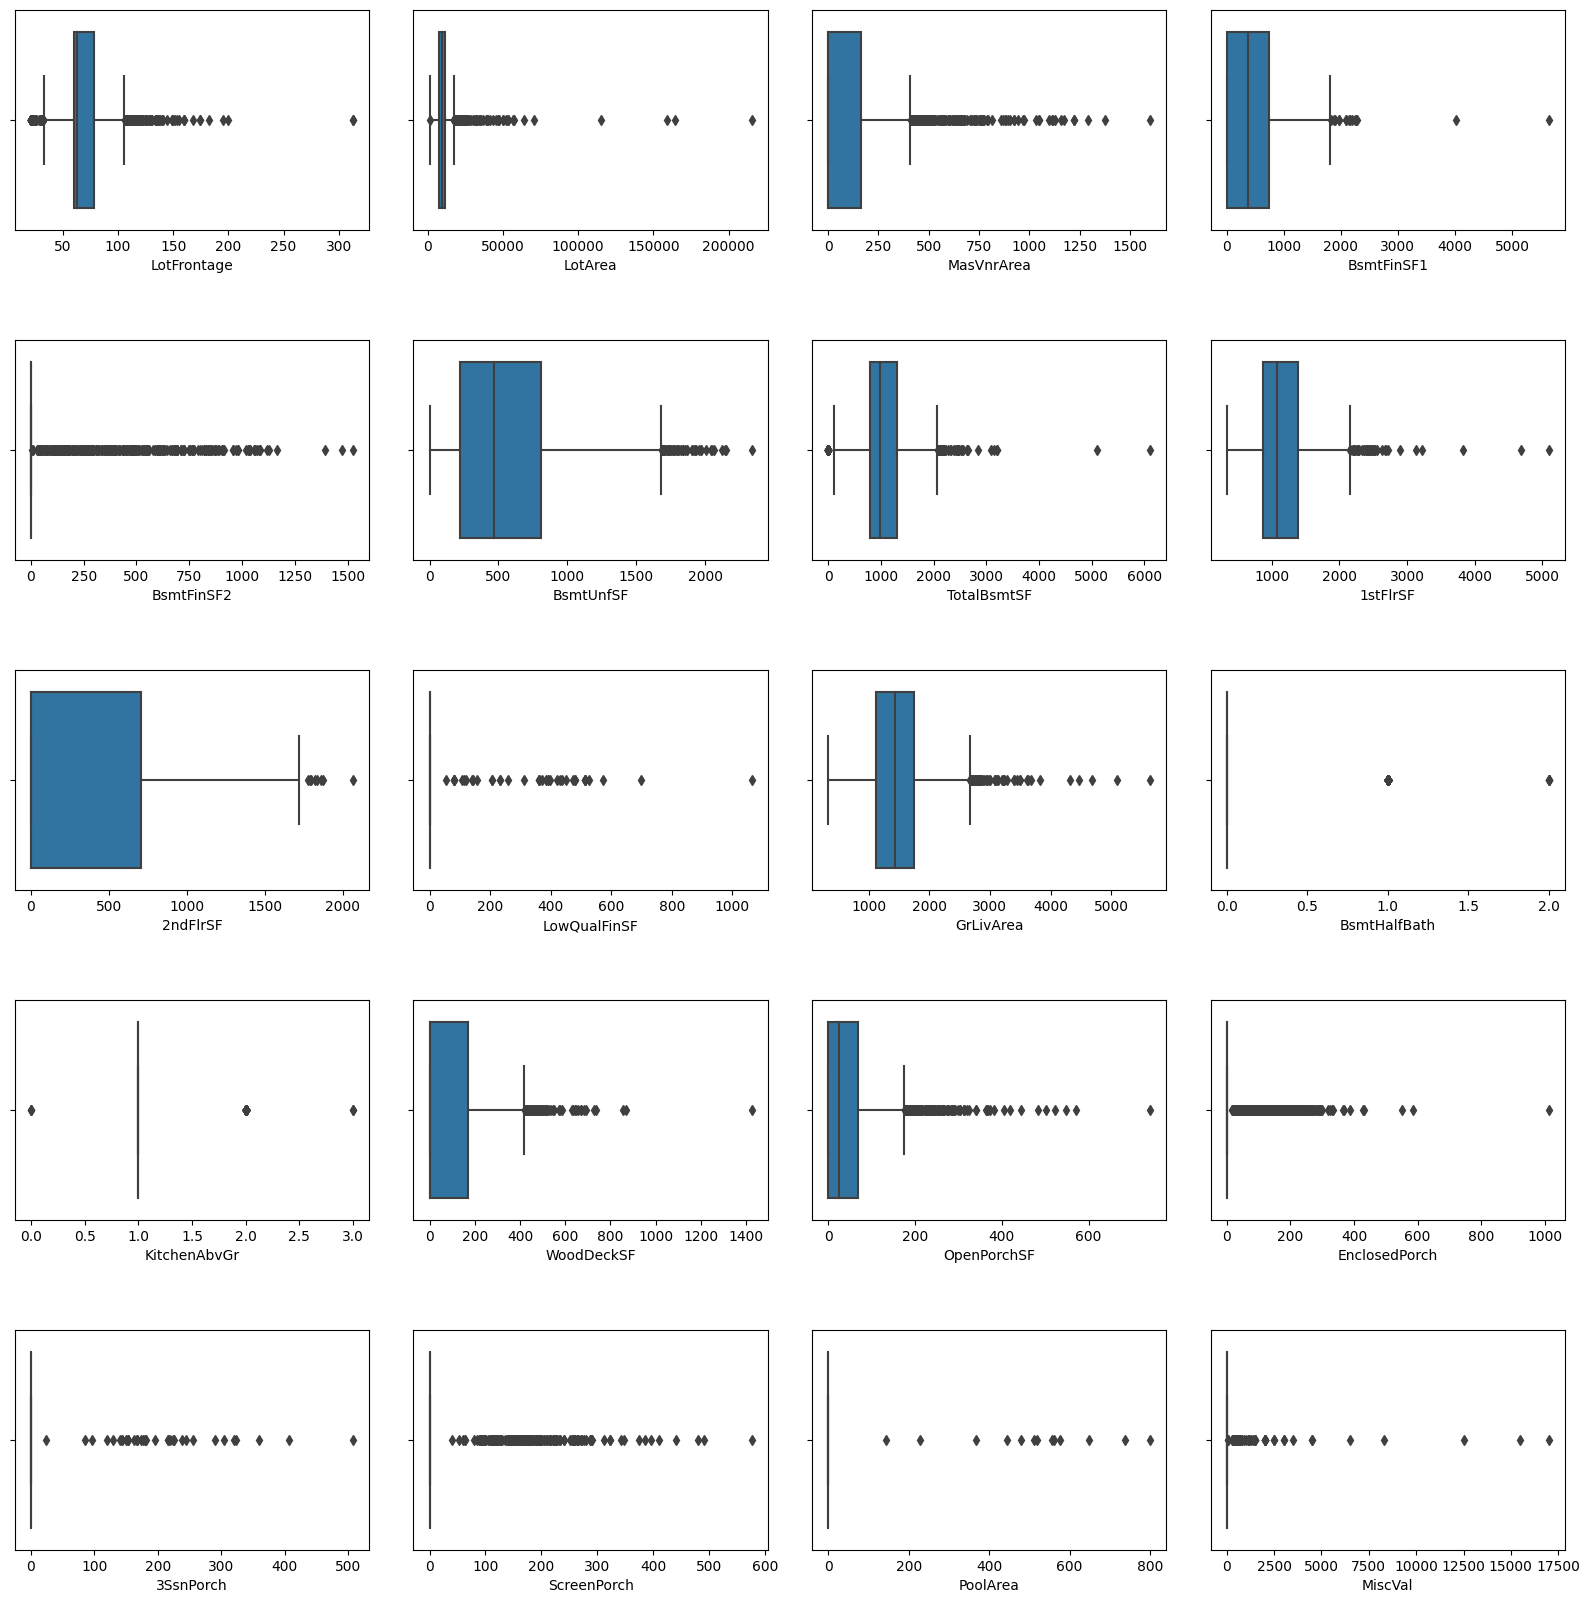

In [31]:
plt.figure(figsize=(20, 20))
for i in range(len(skewed_numerical_cols)):
    plt.subplots_adjust(hspace=.5, wspace=.125)
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df_combined[skewed_numerical_cols[i]])

<ipython-input-32-29e72940f97f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_combined[skewed_numerical_cols[i]])
<ipython-input-32-29e72940f97f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_combined[skewed_numerical_cols[i]])
<ipython-input-32-29e72940f97f>:5: UserWarning: 

`d

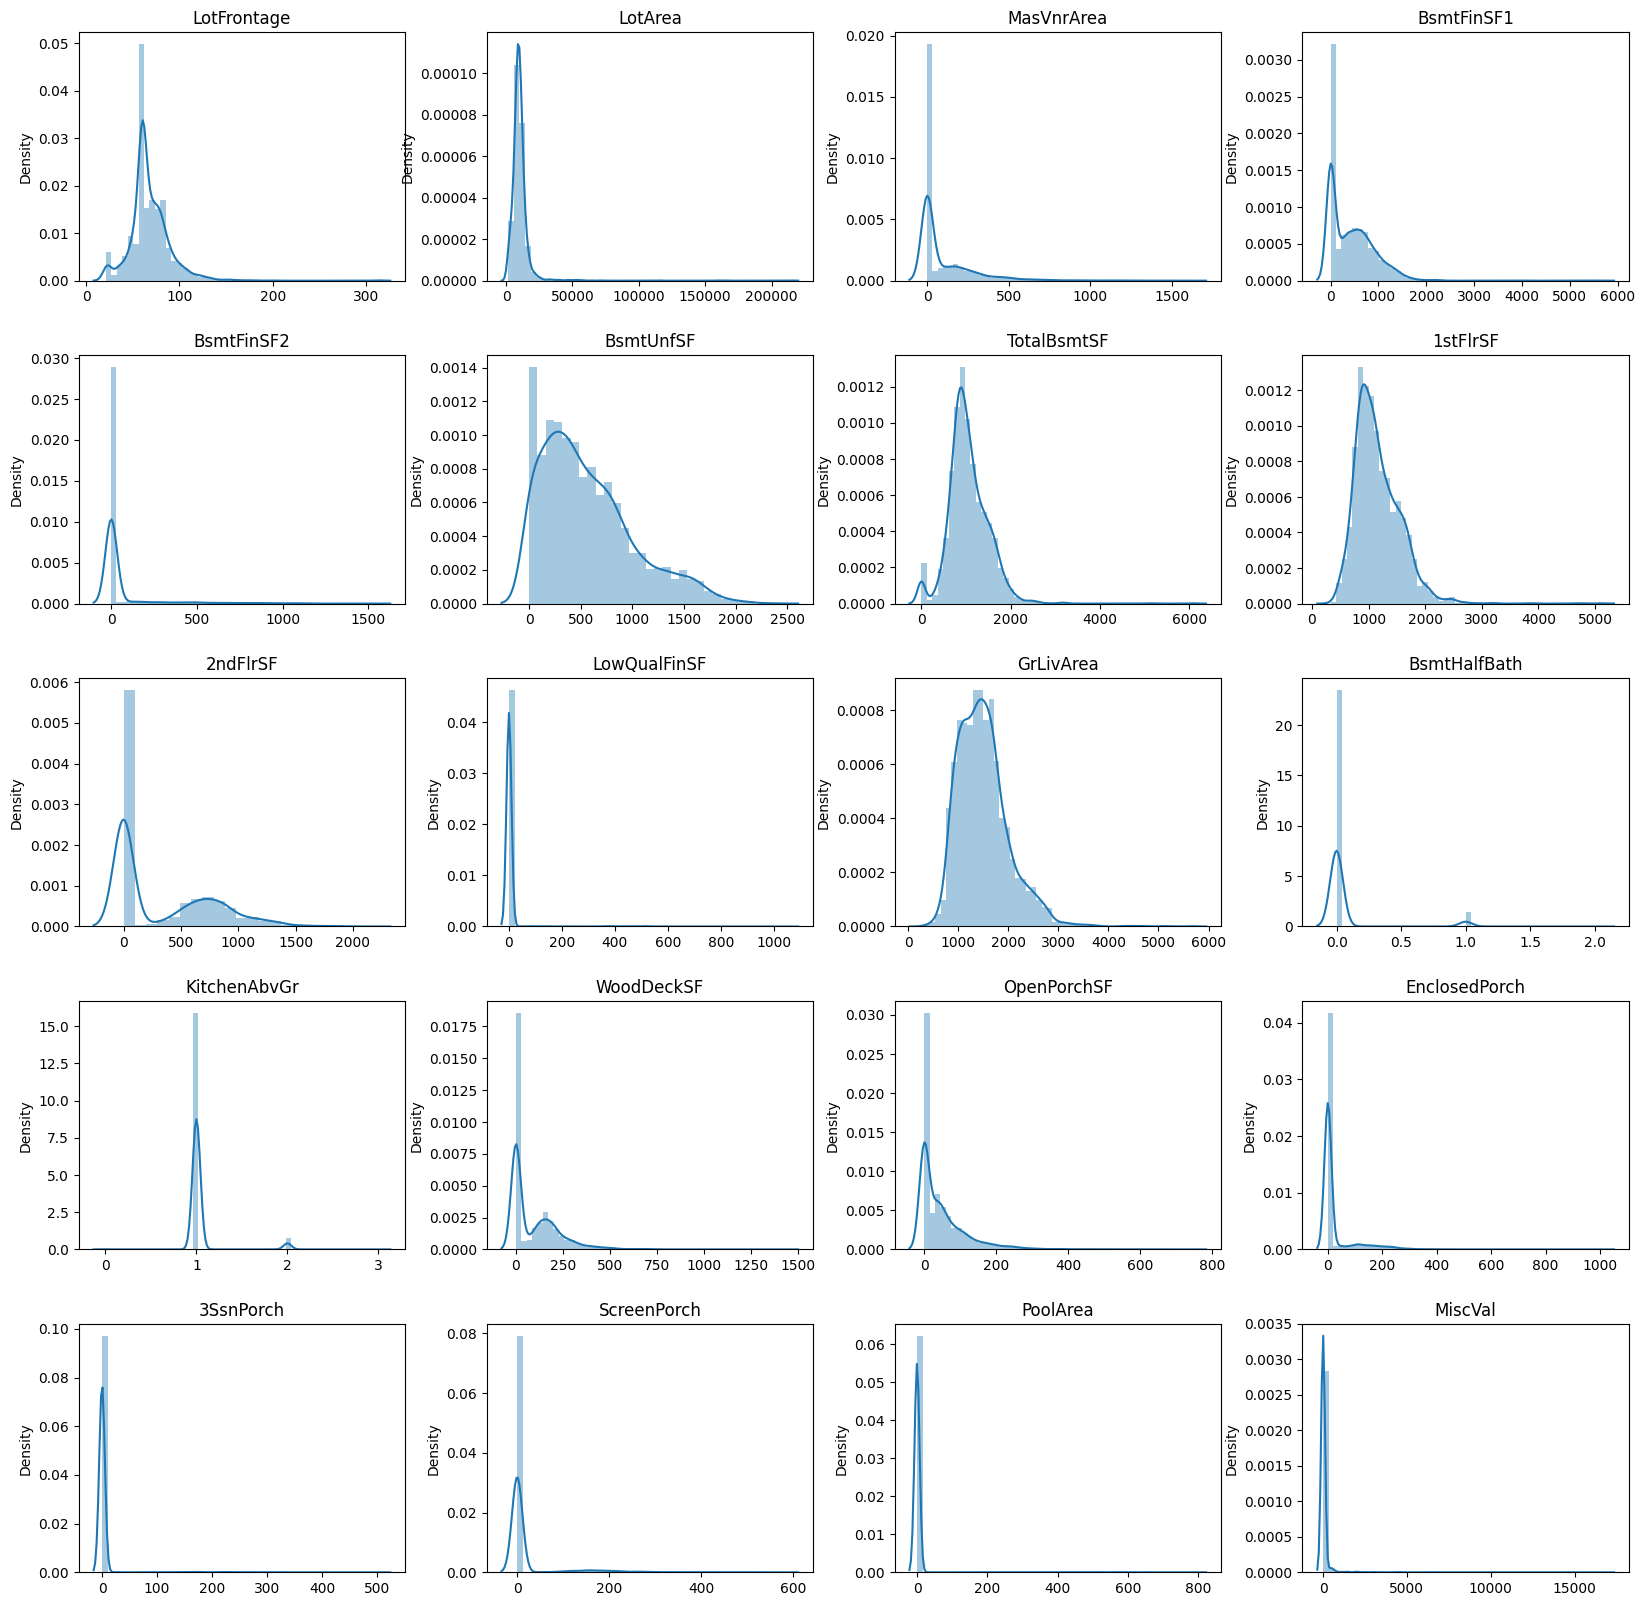

In [32]:
plt.figure(figsize=(20, 20))
for i in range(len(skewed_numerical_cols)):
    plt.subplots_adjust(hspace=.3, wspace=.25)
    plt.subplot(5, 4, i+1)
    sns.distplot(x=df_combined[skewed_numerical_cols[i]])
    plt.title(skewed_numerical_cols[i], size=12)

In [33]:
cols_to_remove = ['BsmtFinSF2','LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','KitchenAbvGr']
new_skewed_numerical_cols = list(set(skewed_numerical_cols) - set(cols_to_remove))
print(f"Değiştirilen alan sayısı: {len(new_skewed_numerical_cols)}")
print(f"İşlenmesi önerilen alan sayısı: {len(skewed_numerical_cols)}")

Değiştirilen alan sayısı: 11
İşlenmesi önerilen alan sayısı: 20


In [34]:
df_combined_capped = df_combined.copy()
for col in new_skewed_numerical_cols:
    q1 = df_combined_capped[col].quantile(.25)
    q3 = df_combined_capped[col].quantile(.75)

    IQR = q3- q1
    lower_bound = q1 - (1.5* IQR)
    upper_bound = q3 + (1.5* IQR)

    df_combined_capped[col] = np.where(df_combined_capped[col] > upper_bound, upper_bound,
                                np.where(df_combined_capped[col] < lower_bound,
                                         lower_bound, df_combined_capped[col]))
print(f"Aykırı verilerle birlikte veri biçimi: {df_combined.shape}\nAykırı veriler olmadan veri biçimi: {df_combined_capped.shape}")

Aykırı verilerle birlikte veri biçimi: (2919, 79)
Aykırı veriler olmadan veri biçimi: (2919, 79)


<ipython-input-35-691deda3864d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_combined[col]).set(title="Before capping")
<ipython-input-35-691deda3864d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_combined_capped[col], color="#1BB772").set(title="After capping")
<ipython-input-35-

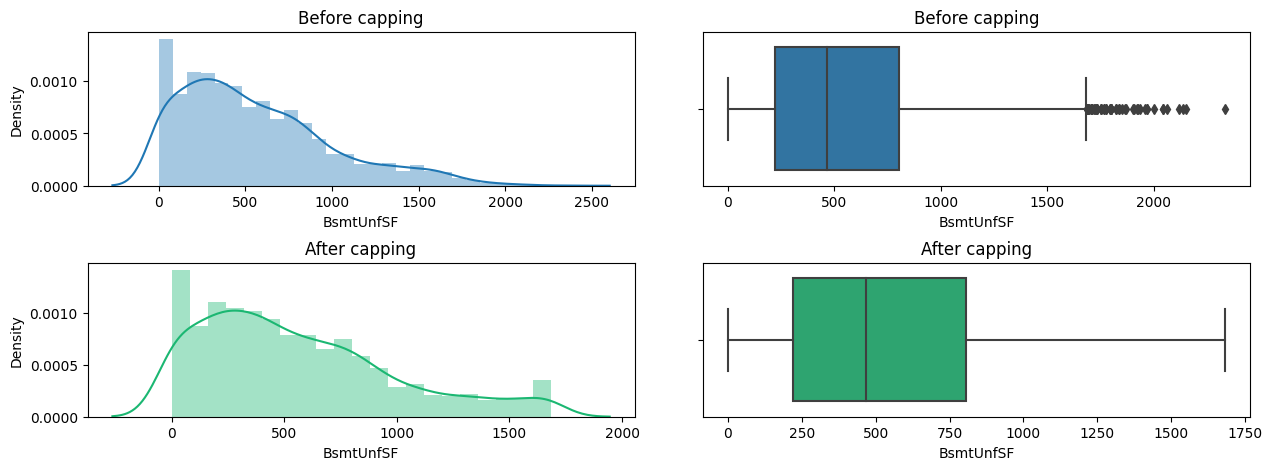

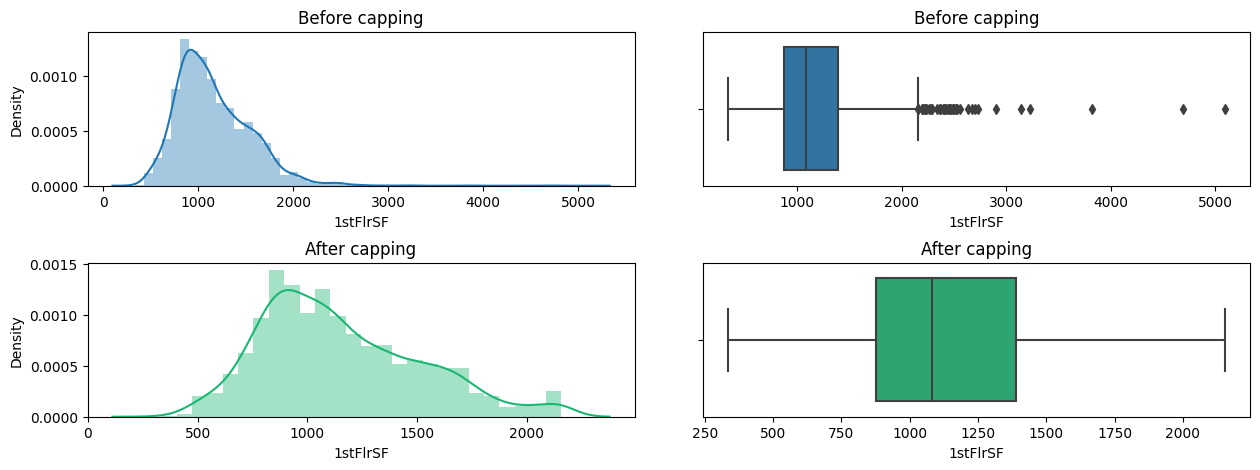

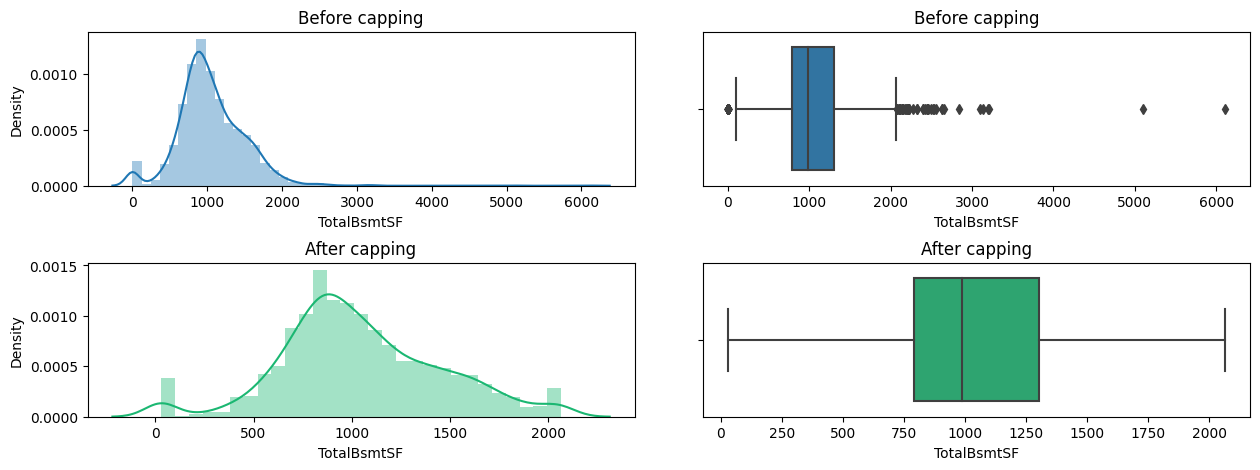

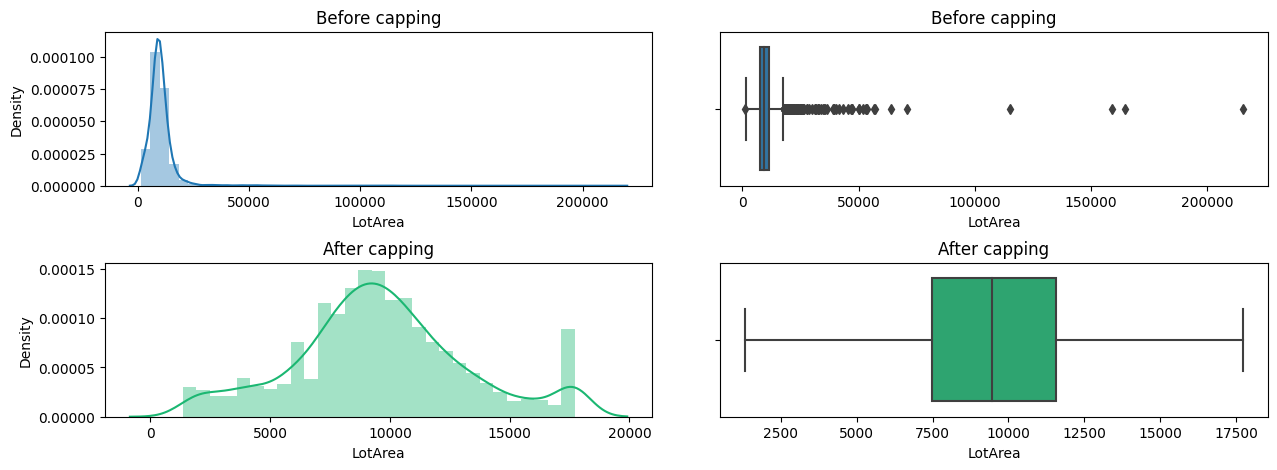

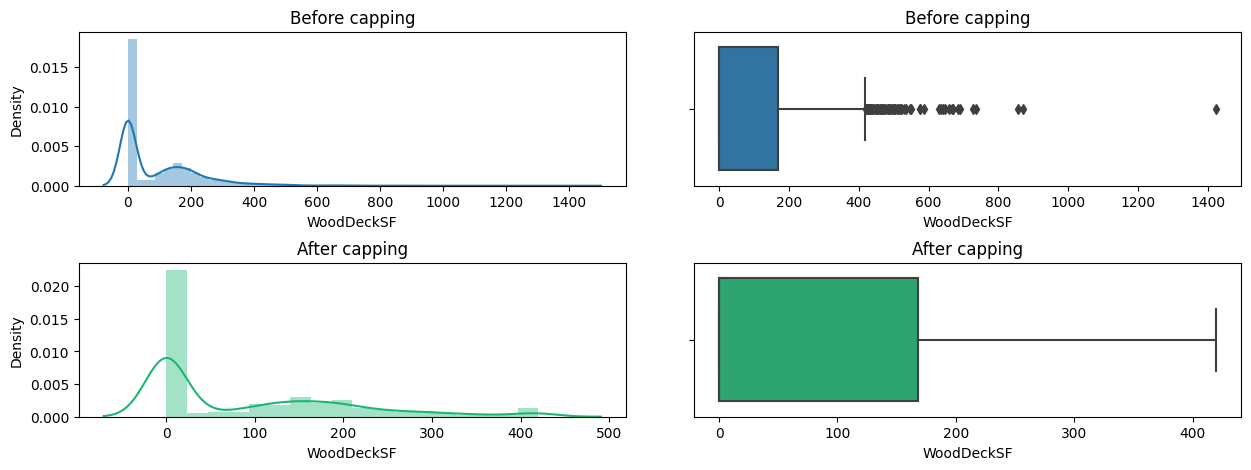

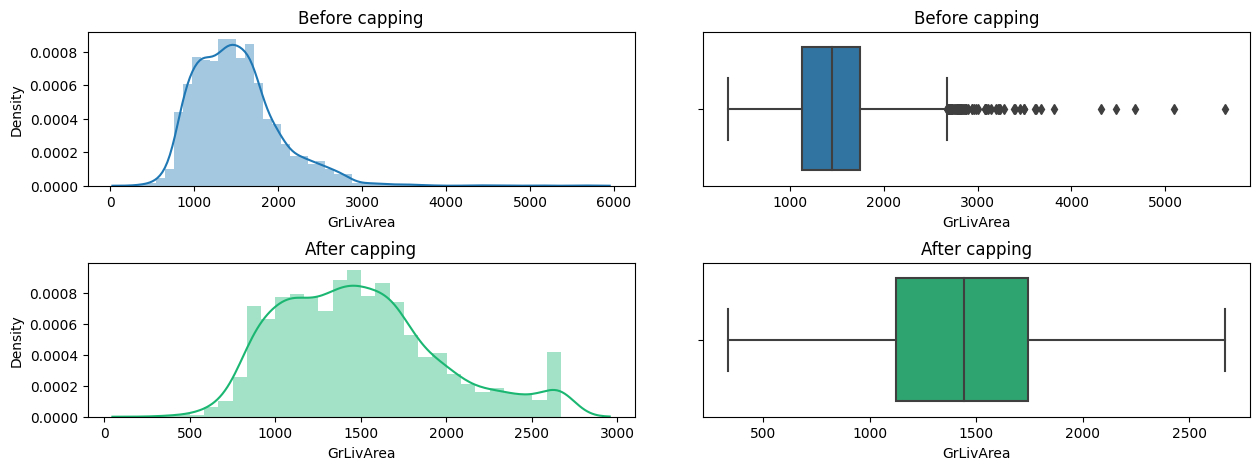

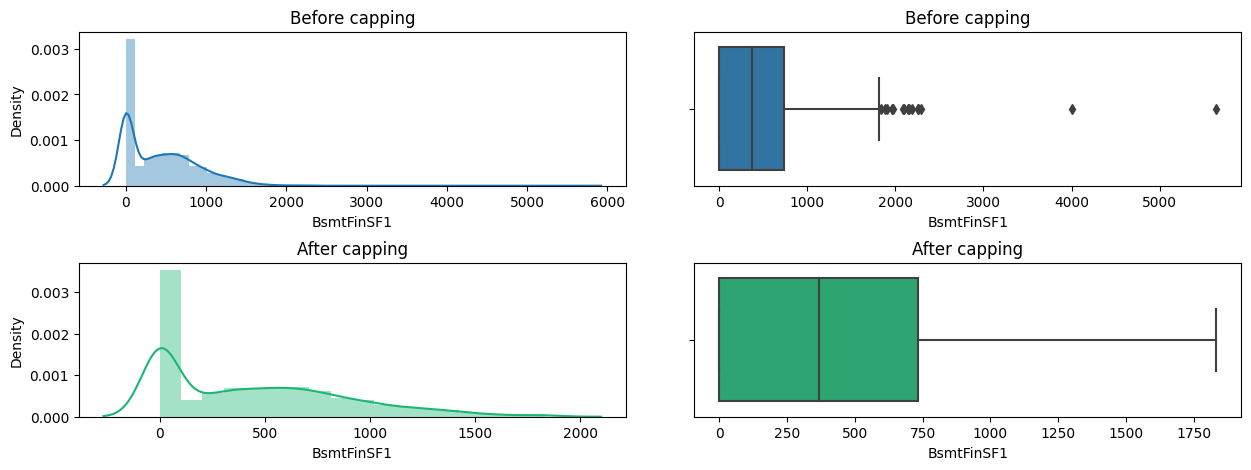

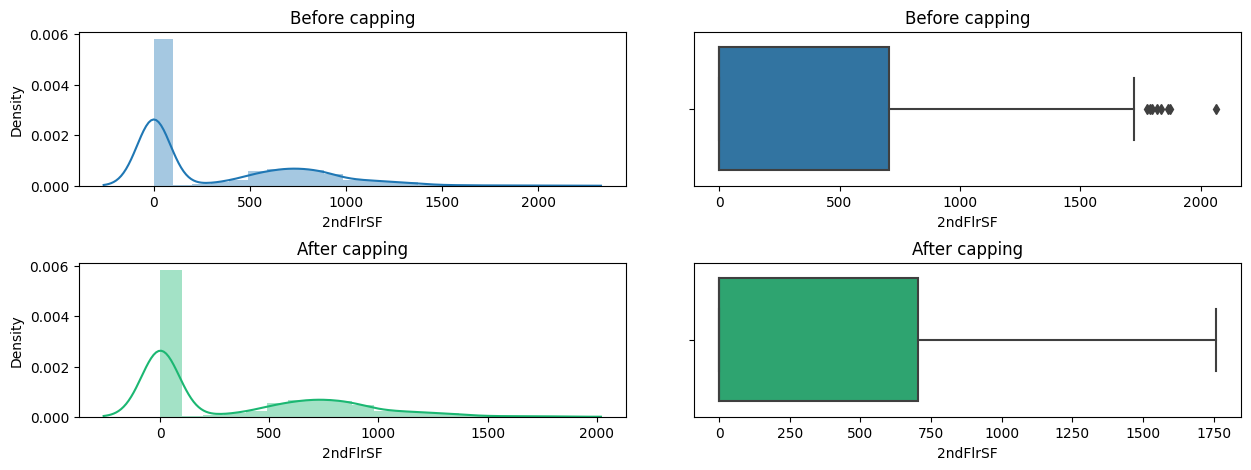

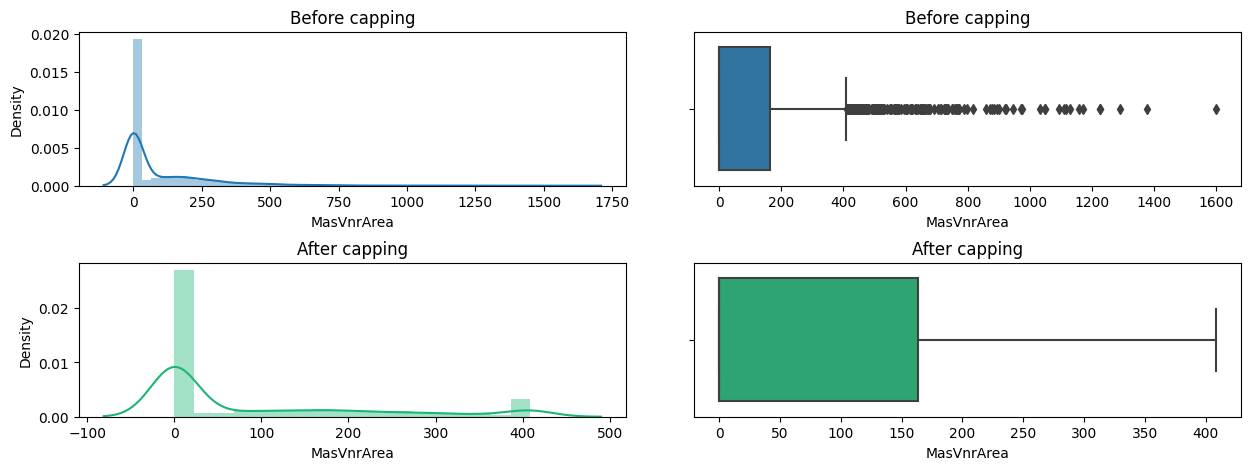

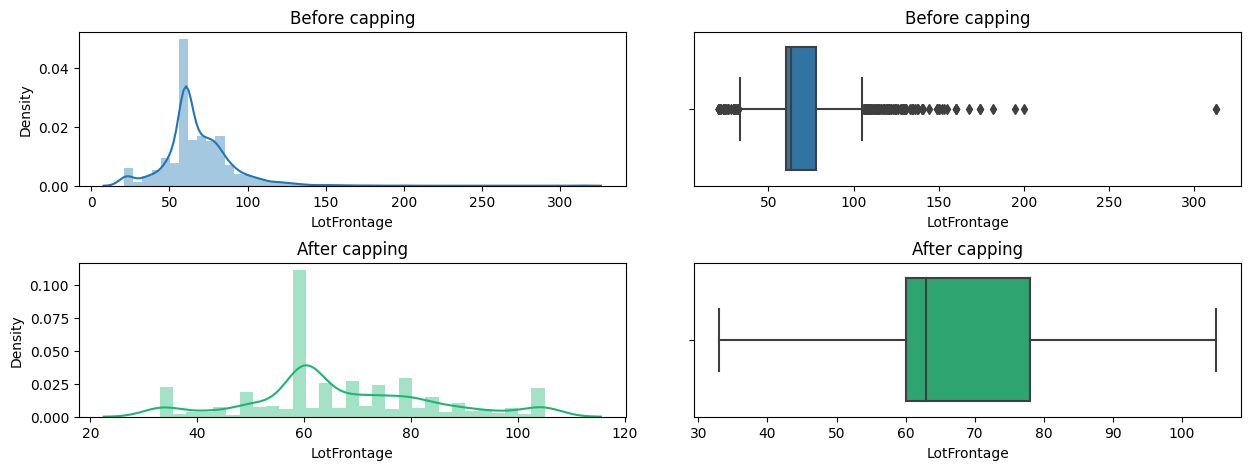

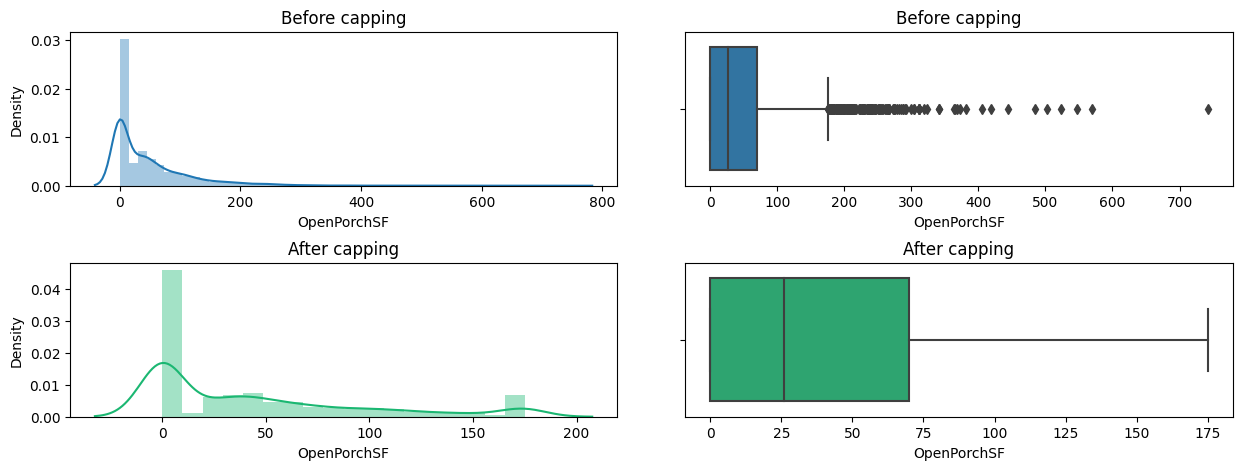

In [35]:
for col in new_skewed_numerical_cols:
    plt.figure(figsize=(15,5))
    plt.subplots_adjust(hspace=.5, wspace=.125)

    plt.subplot(2, 2, 1)
    sns.distplot(df_combined[col]).set(title="Before capping")

    plt.subplot(2, 2, 2)
    sns.boxplot(x= df_combined[col]).set(title="Before capping")

    plt.subplot(2, 2, 3)
    sns.distplot(df_combined_capped[col], color="#1BB772").set(title="After capping")

    plt.subplot(2, 2, 4)
    sns.boxplot(x= df_combined_capped[col], color="#1BB772").set(title="After capping")

In [36]:
X_train = df_combined_capped.loc[:len(train_df)-1]
X_test = df_combined_capped.loc[len(train_df):]

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [38]:
y_train = np.log(target_var)

In [40]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [41]:
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


models = {
    "CatBoost": CatBoostRegressor(verbose=0),
    "Bayesian Ridge": BayesianRidge(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Ridge": Ridge(),
}
i = 1
for name, model in models.items():
    model.fit(X_train, y_train)
    i += 1
    if i == len(models):
        print("Tüm modeller çalıştı")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3210
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 73
[LightGBM] [Info] Start training from score 12.024051
Tüm modeller çalıştı


In [42]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=30)

results = {}
for name, model in models.items():
    res = np.exp(np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = np.mean(res)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3183
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 73
[LightGBM] [Info] Start training from score 12.024156
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3187
[LightGBM] [Info] Number of data points in the train set: 1411, number of used features: 73
[LightGBM] [Info] Start training from score 12.025947
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

In [43]:
for name, res in results.items():
    print(name, "mean error:", res)

CatBoost mean error: 1.126430196789334
Bayesian Ridge mean error: 1.14094060385724
XGBoost mean error: 1.143196712917436
LightGBM mean error: 1.1394609320020763
Ridge mean error: 1.1431878032286429


In [44]:
preds = {}

for name, model in models.items():
    preds.update({name: np.exp(model.predict(X_test))})

#En iyi sonuç CatBoost'a ait.
y_pred = preds["CatBoost"]

In [45]:
final_result = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred.squeeze()})
final_result

,Id,SalePrice
0,1461,124455.785093
1,1462,156617.119340
2,1463,184854.091288
3,1464,193440.503901
4,1465,184484.894482
...,...,...
1454,2915,80597.468826
1455,2916,79484.366945
1456,2917,167267.466138
1457,2918,116740.985785
